In [1]:
%matplotlib inline
import h5py 
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

In [2]:
archive = h5py.File('archive.hdf5', 'r+')

In [3]:
from json import load

sptypes = load(open('sptype_dict.json', 'r'))

In [4]:
sptype = 'G4V'
wavelength = 6562
exp_time = 5 * u.min
V = 10 

In [5]:
from json import load

sptype_to_temp = load(open('sptype_to_temp.json', 'r'))
spectral_types = [key for key in sptype_to_temp.keys() if key in sptypes]
temps = np.array([sptype_to_temp[key] for key in spectral_types])

In [6]:
closest_spectral_type = spectral_types[np.argmin(np.abs(sptype_to_temp[sptype] - temps))]

In [7]:
closest_spectral_type

'G5V'

In [8]:
target = sptypes[closest_spectral_type]

In [9]:
target

'Kepler-17'

In [34]:

@u.quantity_input(exp_time=u.s)
def plot_order_dn(sptype, wavelength, exp_time, V):
    matrix = archive[target][:]
    template_vmag = archive[target].attrs['V'][0]

    closest_order = np.argmin(np.abs(matrix[:, 0] - wavelength))
    lam_0, delta_lam, n_lam = matrix[closest_order][:3]
    polynomial_coeffs = matrix[closest_order][3:]
    wave = np.arange(lam_0 - n_lam*delta_lam/2, lam_0 + n_lam*delta_lam/2, delta_lam)
    magnitude_scaling = 10**(0.4 * (template_vmag - V))
    flux = np.polyval(polynomial_coeffs, wave-lam_0)  * exp_time.to(u.s).value * magnitude_scaling

    fig, ax = plt.subplots()
    ax.plot(wave, flux)
    ax.set_xlabel('Wavelength [Angstrom]')
    ax.set_ylabel('Flux [DN]')
    for s in ['right', 'top']: 
        ax.spines[s].set_visible(False)
    ax.grid(ls=':', color='silver')
    return fig, ax

@u.quantity_input(exp_time=u.s)
def plot_order_sn(sptype, wavelength, exp_time, V):
    matrix = archive[target][:]
    template_vmag = archive[target].attrs['V'][0]

    closest_order = np.argmin(np.abs(matrix[:, 0] - wavelength))
    lam_0, delta_lam, n_lam = matrix[closest_order][:3]
    polynomial_coeffs = matrix[closest_order][3:]
    wave = np.arange(lam_0 - n_lam*delta_lam/2, lam_0 + n_lam*delta_lam/2, delta_lam)
    magnitude_scaling = 10**(0.4 * (template_vmag - V))
    flux = np.polyval(polynomial_coeffs, wave-lam_0)  * exp_time.to(u.s).value * magnitude_scaling

    sn = flux / np.sqrt(flux)
    
    fig, ax = plt.subplots()
    ax.plot(wave, sn)
    ax.set_xlabel('Wavelength [Angstrom]')
    ax.set_ylabel('Signal/Noise')
    for s in ['right', 'top']: 
        ax.spines[s].set_visible(False)
    ax.grid(ls=':', color='silver')
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124ab3978>)

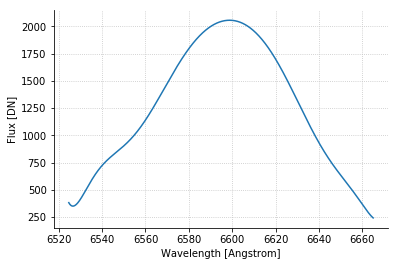

In [35]:
plot_order_dn(sptype, wavelength, exp_time, V)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124b97f98>)

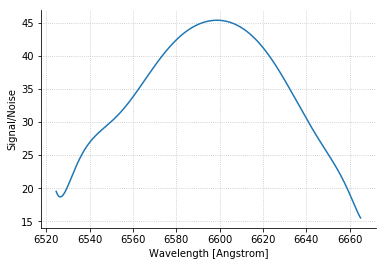

In [36]:
plot_order_sn(sptype, wavelength, exp_time, V)